## Statistical analysis after testing the SVM classifier on the PING dataset

This notebook accompanies below paper:  

[10.1016/j.neuroimage.2018.01.065](https://doi.org/10.1016/j.neuroimage.2018.01.065)

* Strucutral MRI of the [PNC study](http://www.med.upenn.edu/bbl/philadelphianeurodevelopmentalcohort.html ) were used for this study.  
* Morphological features of the strucutral images were derived using [FreeSurfer](http://freesurfer.net) toolkit.  
* FreeSurfer analysis was performed using [LONI pipeline](http://pipeline.loni.usc.edu) on high performance computing of <font color='red'>**USC**</font> Mark and Mary Stevens Neuroimaging and Informatics [Institute](http://www.ini.usc.edu), Keck school of Medicine of <font color='red'>**USC**</font>. The outputs were QC'ed and used as the input of this notebook. 

author:  
Farshid Sepehrband,   
*Laboratory of Neuro Imaging, USC Mark and Mary Stevens Neuroimaging and Informatics Institute, Keck School of Medicine of USC, University of Southern California, Los Angeles, CA, USA*
<farshid.sepehrband@loni.usc.edu>  
@fsepehrband



In [1]:
# some basic and general libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import pandas as pd 
# import seaborn as sns
import os
import time

## Plotting prediction accuracy of the sex difference model against the gold standard and the baseline

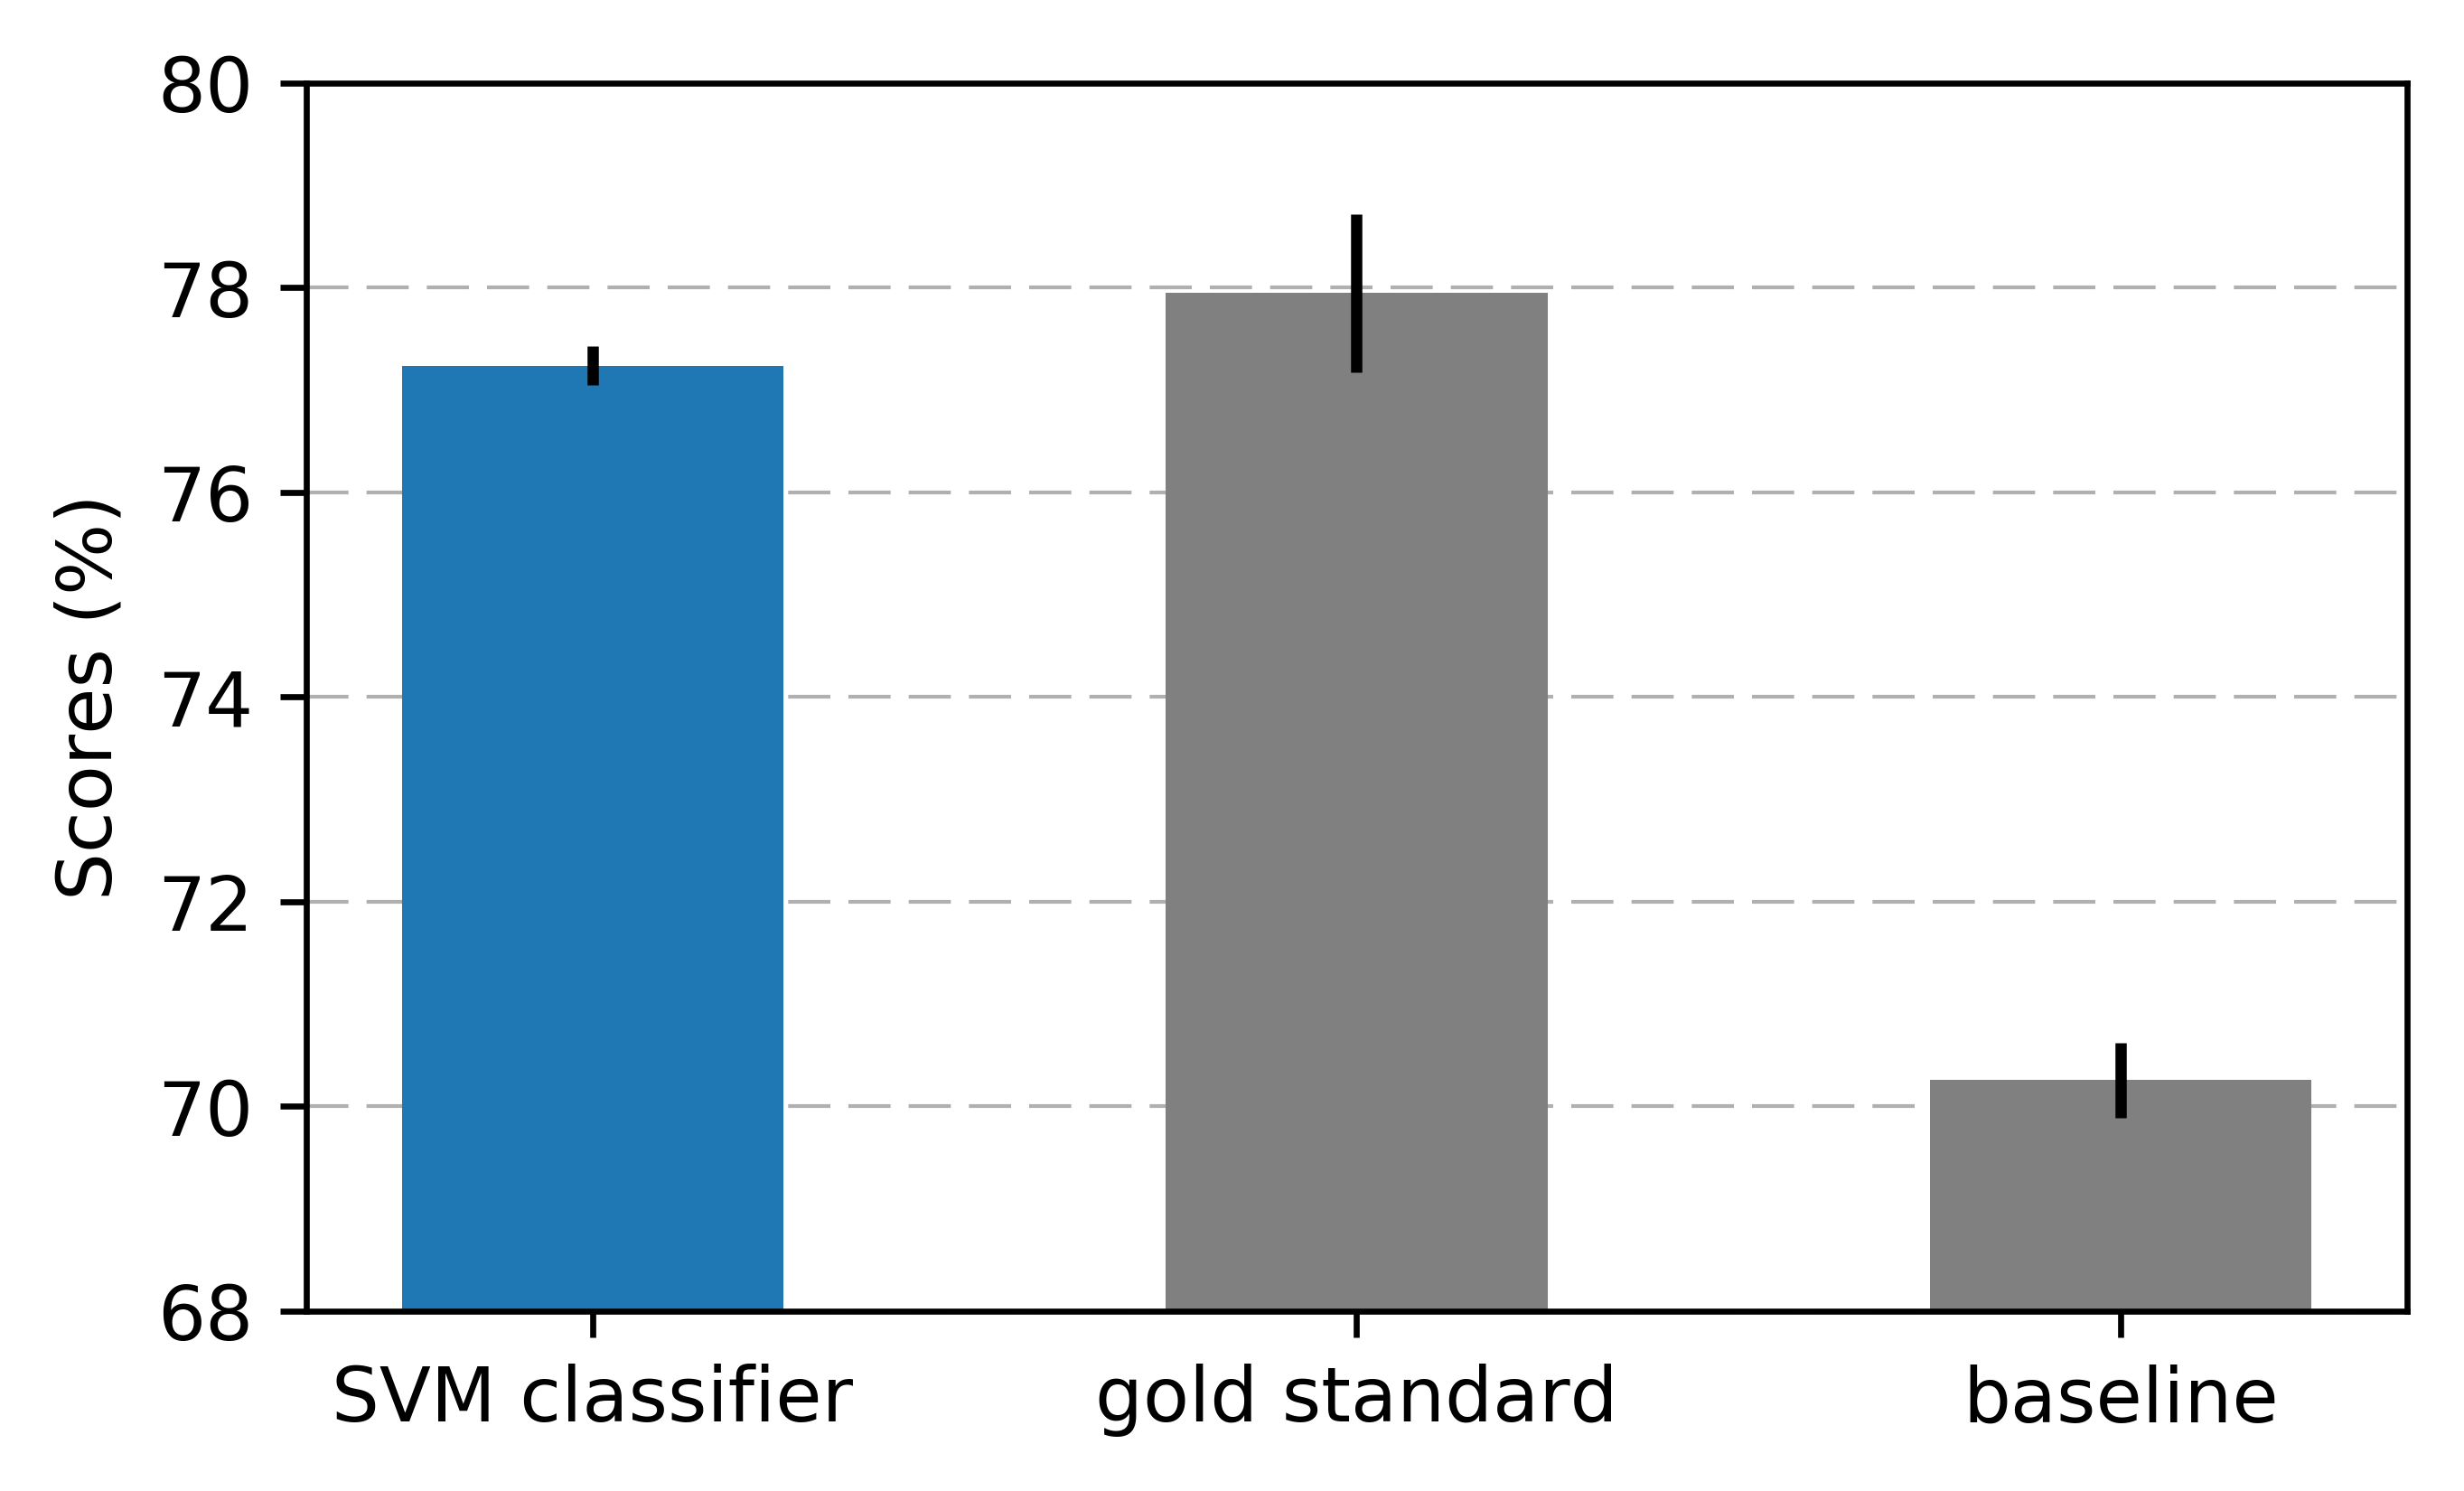

In [2]:
df = pd.read_csv('../../NeuroAnat_SexDiff_data/PNC_PNG_test.csv')
df = df * 100

f, ax = plt.subplots(figsize=(5, 3),dpi=600)

p1 = plt.bar(0, df.PApng.mean(), 0.5, yerr=df.PApng.std()) # , color='#d62728'
p2 = plt.bar(1, df.VApng.mean(), 0.5, color='gray', yerr=df.VApng.std())
plt.bar(2, df.VApngicv.mean(), 0.5, color='gray', yerr=df.VApngicv.std())

plt.ylabel('Scores (%)',size=10)
plt.yticks(fontsize=10)
plt.ylim([68,80])

plt.xticks(range(3), ('SVM classifier', 'gold standard', 'baseline'),size=10)
plt.xticks(fontsize=10)

ax.yaxis.grid(linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

plt.show()

## performance statistical summary of the difference between SVM classifier, the gold standard and the baseine 

In [3]:
import scipy.stats as scs
def cohen_d(x,y):
        return (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x, ddof=1) ** 2 + np.std(y, ddof=1) ** 2) / 2.0)

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "-"

Stat = pd.DataFrame(index=('vs gold standard','vs baseline') 
                    , columns=('Tstat','Pvalue','CohenD'))
Stat.loc['vs gold standard','Tstat':'Pvalue'] = scs.ttest_ind(df.PApng, df.VApng)    
Stat.loc['vs gold standard','Pstar'] = stars(Stat.loc['vs gold standard','Pvalue'])
Stat.loc['vs gold standard','CohenD'] = cohen_d(df.PApng, df.VApng)
Stat.loc['vs baseline','Tstat':'Pvalue'] = scs.ttest_ind(df.PApng, df.VApngicv)
Stat.loc['vs baseline','Pstar'] = stars(Stat.loc['vs baseline','Pvalue'])
Stat.loc['vs baseline','CohenD'] = cohen_d(df.PApng, df.VApngicv)
Stat.Tstat = np.round(Stat.Tstat.values.astype(np.double), decimals=2)
Stat.CohenD = np.round(Stat.CohenD.values.astype(np.double), decimals=2)
# Stat.Pvalue = np.round(Stat.Pvalue, decimals=2)

Stat.head()
# print('Cohen d of 1 and 2 is:',cohen_d(df.PApng, df.VApng))
# print('Cohen d of 1 and 3 is:',cohen_d(df.PApng, df.VApngicv))

,Tstat,Pvalue,CohenD,Pstar
vs gold standard,-8.90,3.59337e-16,-1.26,****
vs baseline,167.81,2.03688e-215,23.73,****
